# SFR & Kennicutt-Schmidt law

In [1]:
import os
import numpy as np
from IPython.display import Image
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


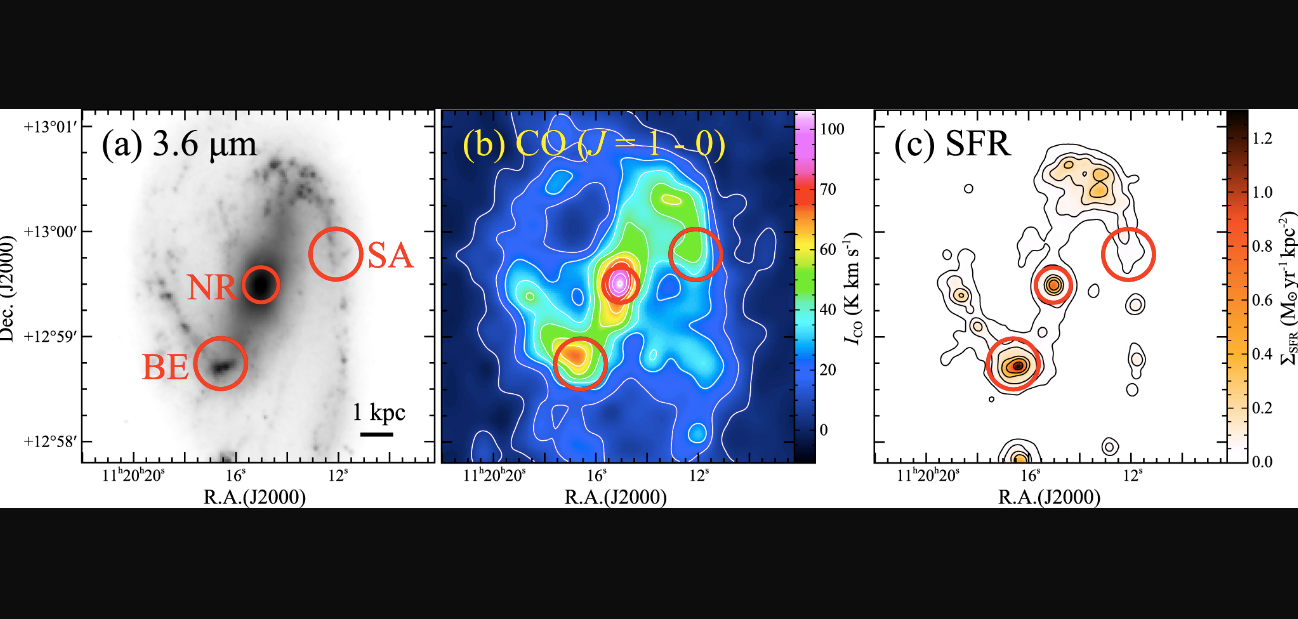

In [2]:
Image(filename='./images/CO_SFR.png')

### SFR

 $$\frac{SFR}{M_{\odot}yr^{-1}} = 5.37\times 10^{-42} \frac{L_{H\alpha}}{erg \times s^{-1}}$$

$$\Sigma_{SFR}[M_{\odot}yr^{-1}kpc^{-2}] $$

$$L(H_{\alpha}) = 4\pi (3.086\times 10^{24} d_L)^2 f(H_{\alpha})$$, where f(Hα) is the integrated flux in ergs s-1 cm-2 and dL is the luminosity distance in Mpc

In [17]:
Distance = 9.3
H_alpha = np.load('./data/H_alpha.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [18]:
scale = (Distance*1000*2*np.pi)/(360*60*60.) # kpc/acrsec
print(scale)

0.04508767234318684


In [19]:
SFR = np.zeros(dist_kpc.shape)
SFR = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 * H_alpha 

In [20]:
Sigma_SFR = np.zeros(dist_kpc.shape)
Sigma_SFR = SFR/(scale)**2

Text(0.5, 1.0, '$\\Sigma_{SFR}$')

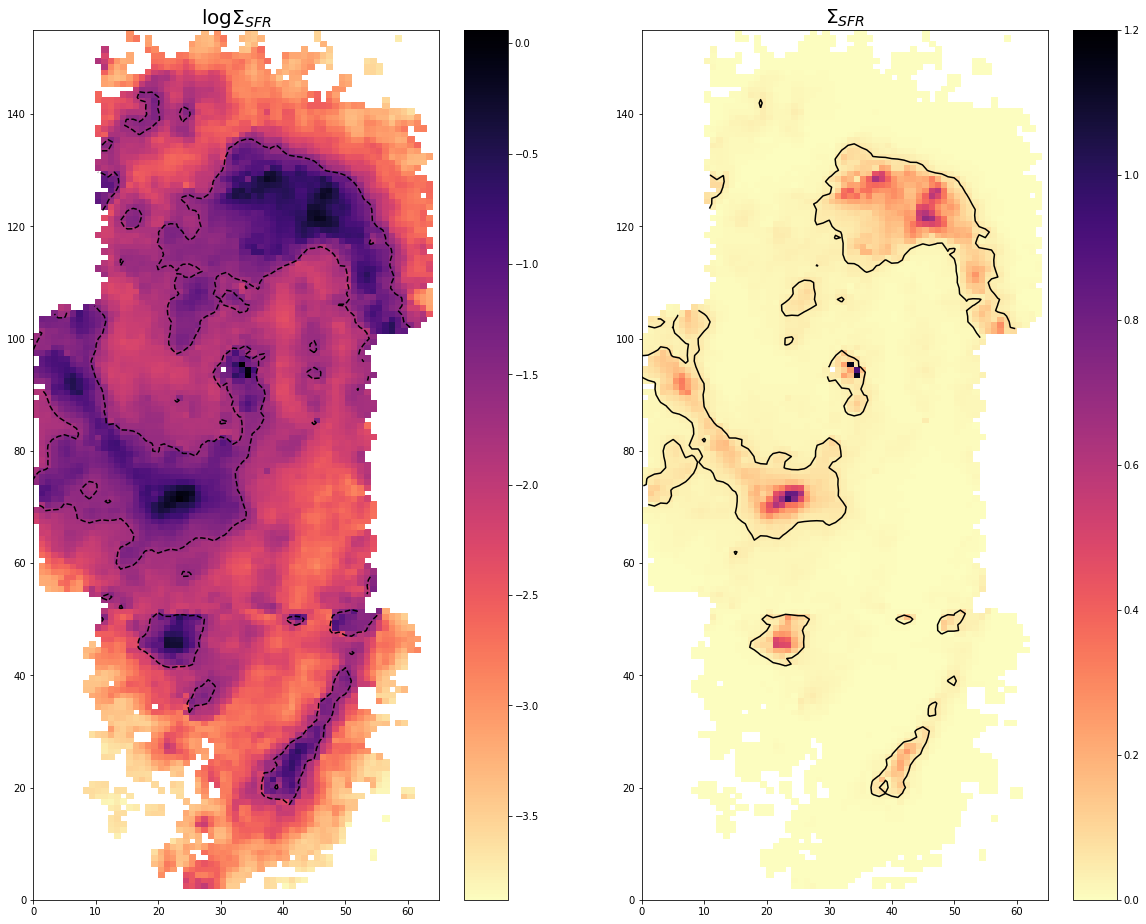

In [33]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[20, 16])
plt.subplot(1,2,1)

CS = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1.6,],aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, np.log10(Sigma_SFR), cmap='magma_r')

quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$\log{\Sigma_{SFR}}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,],aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, Sigma_SFR, cmap='magma_r')
quadmesh.set_clim(vmin=0.,vmax = 1.2)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$\Sigma_{SFR}$', fontsize=20)

Правая картинка(без логарифма) похожа на ту, которую я представила вверху из [этой статьи](https://arxiv.org/pdf/1904.12430.pdf)

### Изобразим закон К-Ш для полной и обрезанной карты

$$\Sigma_{SFR}\propto {\Sigma_{gas}}^N$$, где $N=1.4,1.5$ 

Пусть $\Sigma_{SFR} = k\cdot {\Sigma_{gas}}^N$, тогда $\log{H_{\alpha}} = \log{k}+N\cdot log{\Sigma_{gas}}$

In [24]:
Sigma_H2 = np.load('./data/Sigma_H2.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
H_alpha = np.load('./data/H_alpha.npy')

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


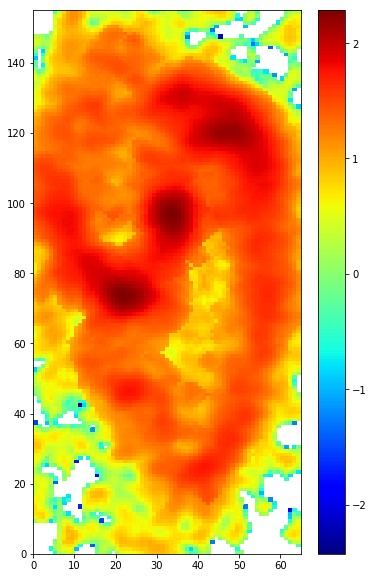

In [25]:
mask = (H_alpha != 0.)
Sigma_g = np.zeros(dist_kpc.shape)
Sigma_g = 1.36*(Sigma_HI + Sigma_H2)
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[6,10])
quadmesh = plt.pcolormesh(X, Y,np.log10(Sigma_g), cmap='jet')
plt.colorbar()

In [34]:
counts = np.zeros((50,30)) 
counts_cut = np.zeros((50,30))

for j, gas in enumerate(np.linspace(0.7, 2.2, 30)):
    for i, hlim in enumerate(np.linspace(-2.0, 0.5, 50)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts[i][j]+=1
                
                if (dist_kpc[k][l] <= 5) & (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts_cut[i][j]+=1    

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


Нарисуем закон К-Ш почти для полной и обрезанной карты

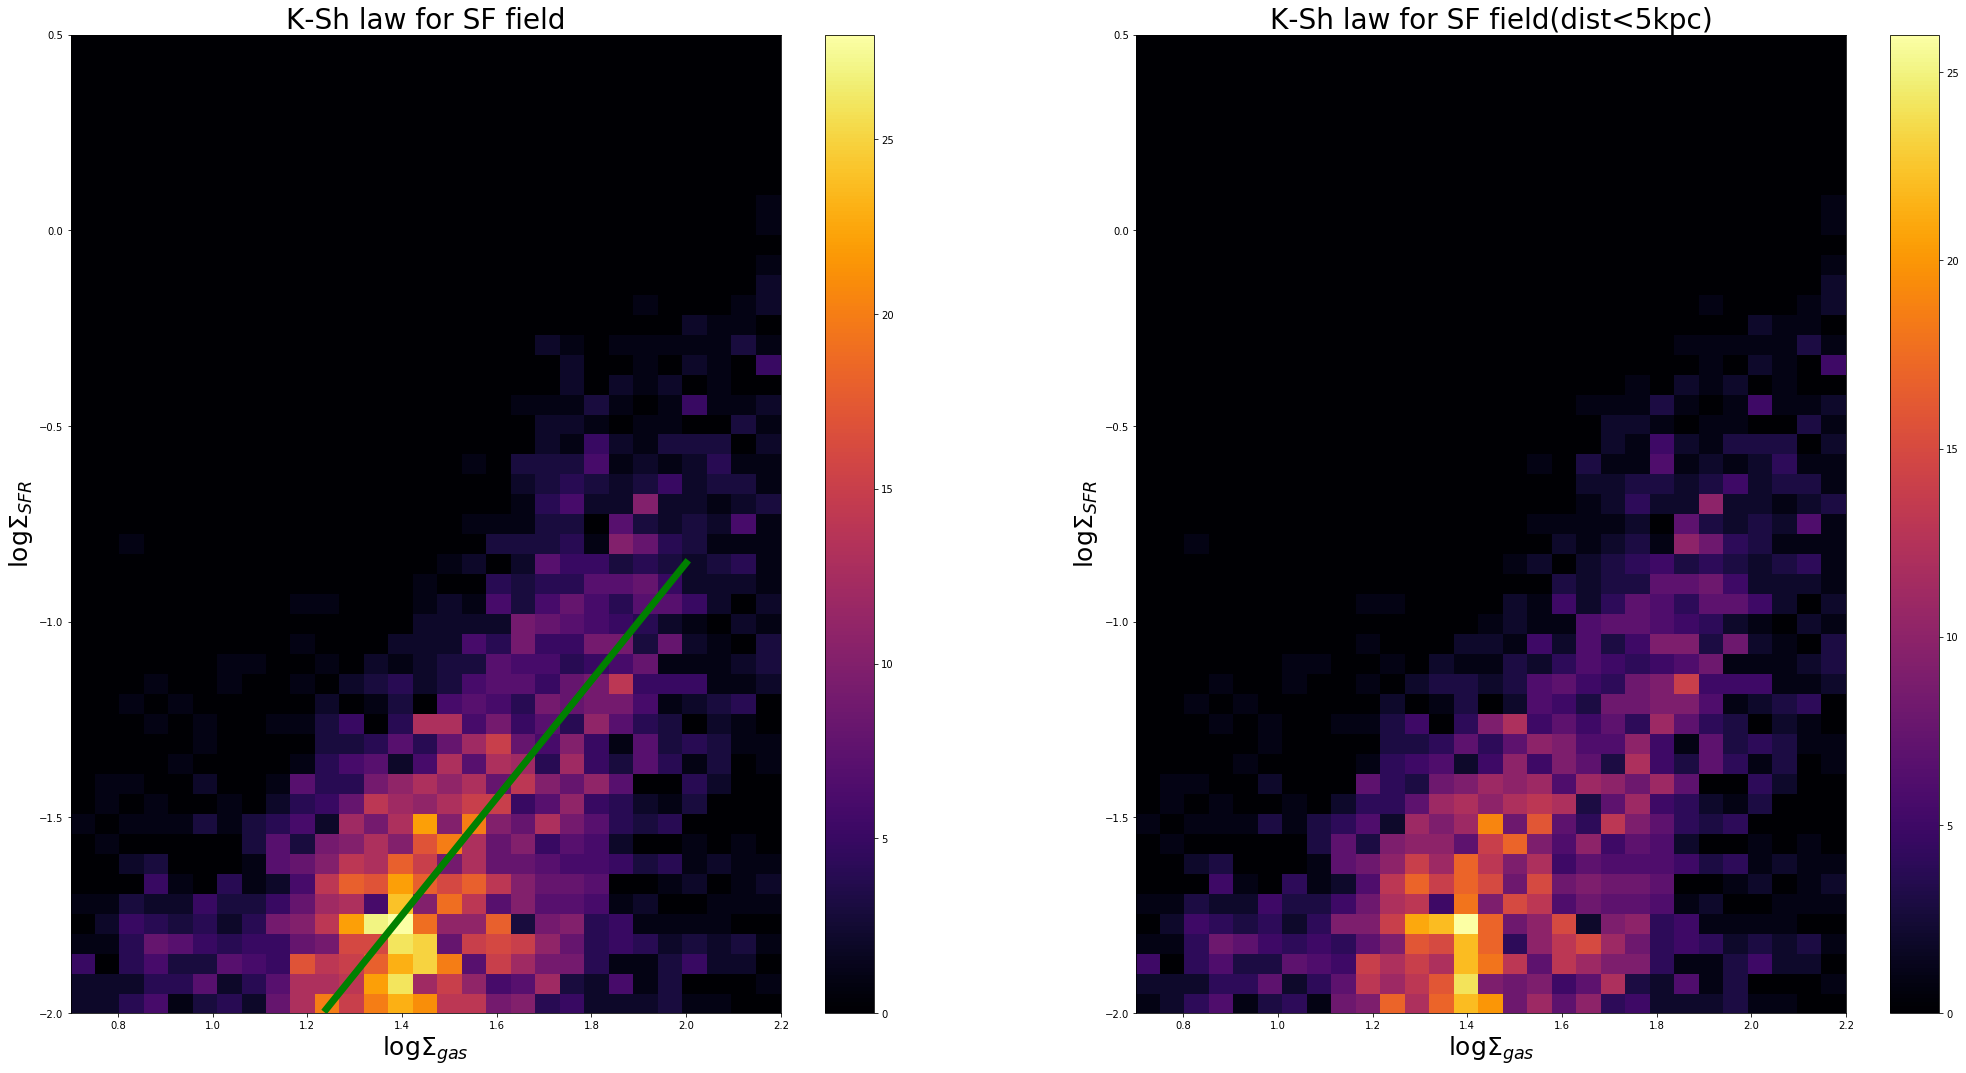

In [39]:
xx, yy = np.meshgrid(np.linspace(0.7, 2.2, 30),np.linspace(-2., 0.5, 50))
fig = plt.figure(figsize=[35, 18])

plt.subplot(1,2,1)

quadmesh = plt.pcolormesh(xx, yy, counts, cmap='inferno')
a = 1.5
b = -3.85
#В принципе похоже на закон К-Ш со степенью N=1.5,
plt.plot([1.24, 2.], [1.24*a+b, 2.*a+b], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)
plt.colorbar()
          
plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(xx, yy, counts_cut, cmap='inferno')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field(dist<5kpc)', fontsize=28)
plt.colorbar()

Нарисуем теперь этот закон конкретно для облатей звездообразования

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10


Text(0.5, 1.0, 'K-Sh law for SF field(dist<5kpc)')

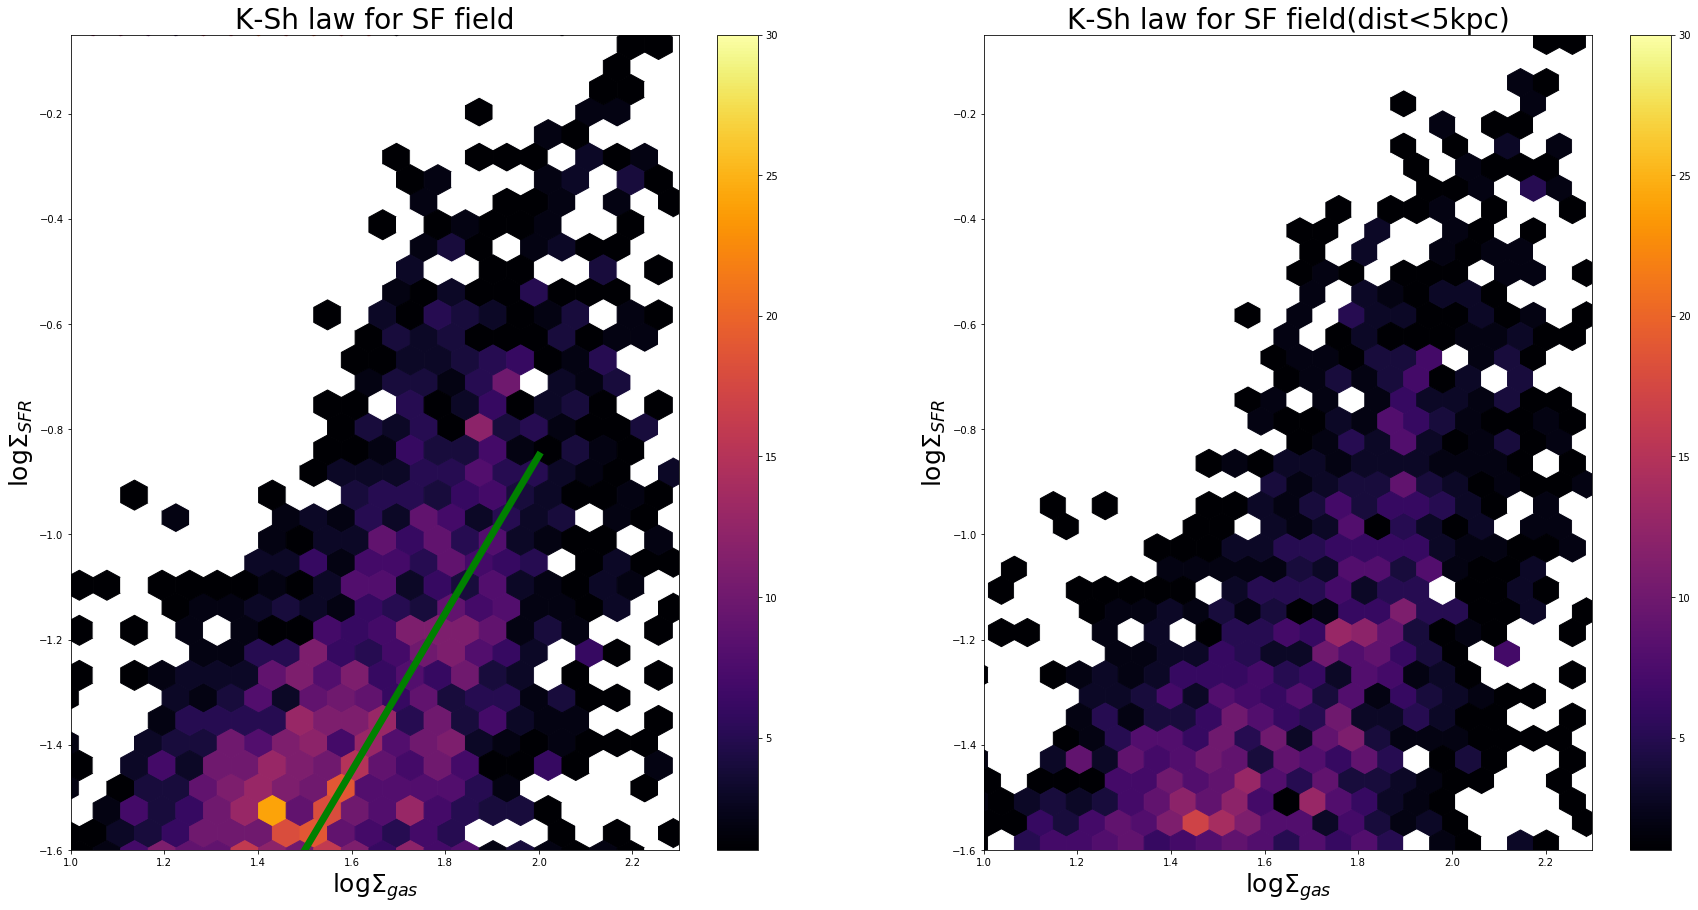

In [40]:
fig = plt.figure(figsize=[30,15])
plt.subplot(1,2,1)

mask = (H_alpha!=NAN)
x = np.nan_to_num(np.log10(Sigma_SFR[mask].ravel()))
y = np.nan_to_num(np.log10(Sigma_g[mask].ravel()))
hb = plt.hexbin(y, x, gridsize=80, cmap=cm.inferno, vmin=1,vmax=30)
hb.cmap.set_under('white')

#a = 1.48
#b = -4.13
#plt.plot([0.5, 1.5], [0.5*a+b, 1.5*kslaw+kslaw_bias], '-', lw=7, color='g')
#plt.ylabel(r'$\log \Sigma_\mathrm{SFR}$', fontsize=fs)

plt.xlim(1., 2.3)
plt.ylim(-1.6, -0.05)
plt.colorbar()
a = 1.5
b = -3.85
plt.plot([1.2, 2.], [1.2*a+b, 2.*a+b], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)

plt.subplot(1,2,2)
mask = (H_alpha!=0) & (dist_kpc<=5)
x = np.nan_to_num(np.log10(Sigma_SFR[mask].ravel()))
y = np.nan_to_num(np.log10(Sigma_g[mask].ravel()))

hb = plt.hexbin(y, x, gridsize=80, cmap=cm.inferno, vmin=1, vmax=30)
hb.cmap.set_under('white')
plt.xlim(1, 2.3)
plt.ylim(-1.6, -0.05)
plt.colorbar()
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field(dist<5kpc)', fontsize=28)


#### Статистическими методами был подобран порог для звёздообразования $\log{H_{alpha}} = -14.15$, надём эквивалентное ему значение $\Sigma_{SFR}$

In [30]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -14.15,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.04531952924242865
